In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [4]:
df = pd.read_csv('../data/my_data.csv')
df['Crime_Date'] = pd.to_datetime(df['Crime_Date'])
# Create a new column for the weekday (as a string, e.g., "Monday")
df['Weekday'] = df['Crime_Date'].dt.day_name()

C:\Users\Leuro\AppData\Local\Temp\ipykernel_28692\2986999421.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/my_data.csv')


In [5]:
df['Crime_Date'].head()

0   2004-11-22
1   2005-10-18
2   2004-02-15
3   2011-02-18
4   2010-11-21
Name: Crime_Date, dtype: datetime64[ns]

In [ ]:
df.columns
print(df['Crime_Date'].head())
print(df['Weekday'].head())
df['Month'] = df['Crime_Date'].dt.month_name()
print(df['Month'].head())
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
print(df['Hour'].head())



0   2004-11-22
1   2005-10-18
2   2004-02-15
3   2011-02-18
4   2010-11-21
Name: Crime_Date, dtype: datetime64[ns]
0     Monday
1    Tuesday
2     Sunday
3     Friday
4     Sunday
Name: Weekday, dtype: object
0    November
1     October
2    February
3    February
4    November
Name: Month, dtype: object
0    17
1    20
2     2
3     5
4    17
Name: Hour, dtype: int32


In [11]:
df['DayOfWeek'] = df['Crime_Date'].dt.dayofweek
df['Hour_Of_Week'] = df['DayOfWeek'] * 24 + df['Hour']
print(df['Hour_Of_Week'].head())

0     17
1     44
2    146
3    101
4    161
Name: Hour_Of_Week, dtype: int32


In [12]:
# Define the fixed order for weekdays
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Define the focus crimes set (we assume that these are already standardized to upper-case)
focuscrimes = set([
    'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT',
    'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 
    'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'
])

# Optional: if not already standardized, convert the 'Crime_Category' to upper-case.
df['Crime_Category'] = df['Crime_Category'].str.upper()

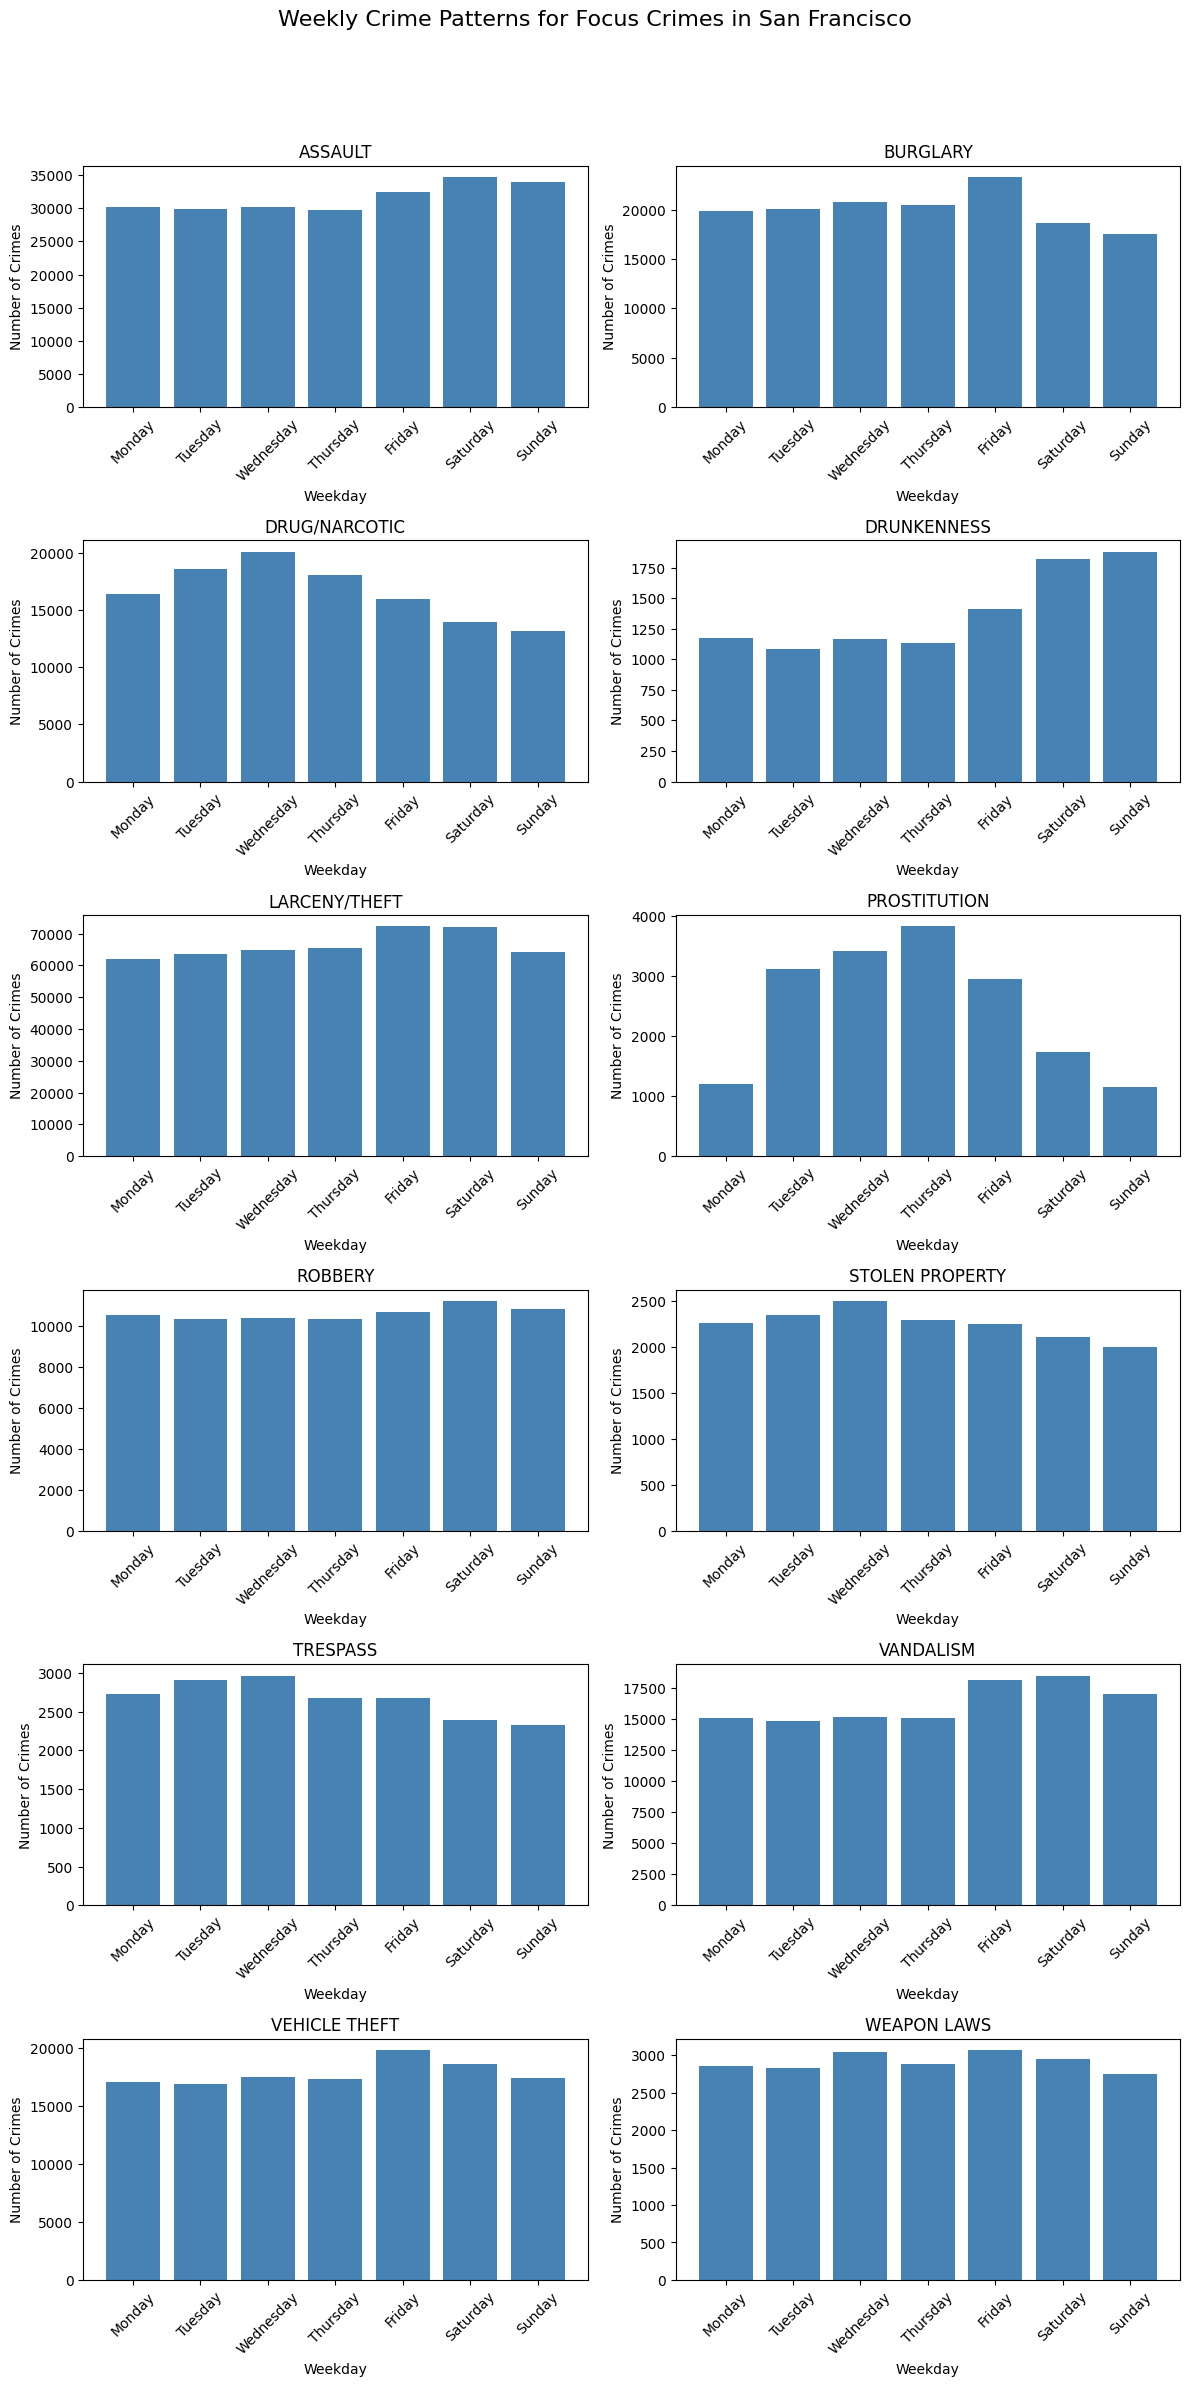

In [13]:
# Prepare the grid for subplots: 7 rows x 2 columns (14 plots in total)
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(12, 28))
axs = axs.flatten()  # flatten the grid for easy iteration

# For each focus crime, count the number of crimes per weekday and plot it.
# We'll sort the focus crimes (alphabetically, or you could define your own order)
for i, crime in enumerate(sorted(focuscrimes)):
    # Filter rows for the given crime category
    crime_df = df[df['Crime_Category'] == crime]
    
    # Count crimes per weekday; reindex to ensure consistent weekday order,
    # using fill_value=0 to account for any weekdays with no crimes.
    weekday_counts = crime_df['Weekday'].value_counts().reindex(weekdays_order, fill_value=0)
    
    # Plot as a bar chart on the subplot
    axs[i].bar(weekdays_order, weekday_counts, color='steelblue')
    axs[i].set_title(crime)
    axs[i].set_xlabel('Weekday')
    axs[i].set_ylabel('Number of Crimes')
    axs[i].tick_params(axis='x', rotation=45)

# Hide any extra subplots (if the number of focus crimes is less than 14)
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

# Add a global title and adjust layout
plt.suptitle("Weekly Crime Patterns for Focus Crimes in San Francisco", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Months

In [14]:
sorted_focus = sorted(focuscrimes)
sorted_focus

['ASSAULT',
 'BURGLARY',
 'DRUG/NARCOTIC',
 'DRUNKENNESS',
 'LARCENY/THEFT',
 'PROSTITUTION',
 'ROBBERY',
 'STOLEN PROPERTY',
 'TRESPASS',
 'VANDALISM',
 'VEHICLE THEFT',
 'WEAPON LAWS']

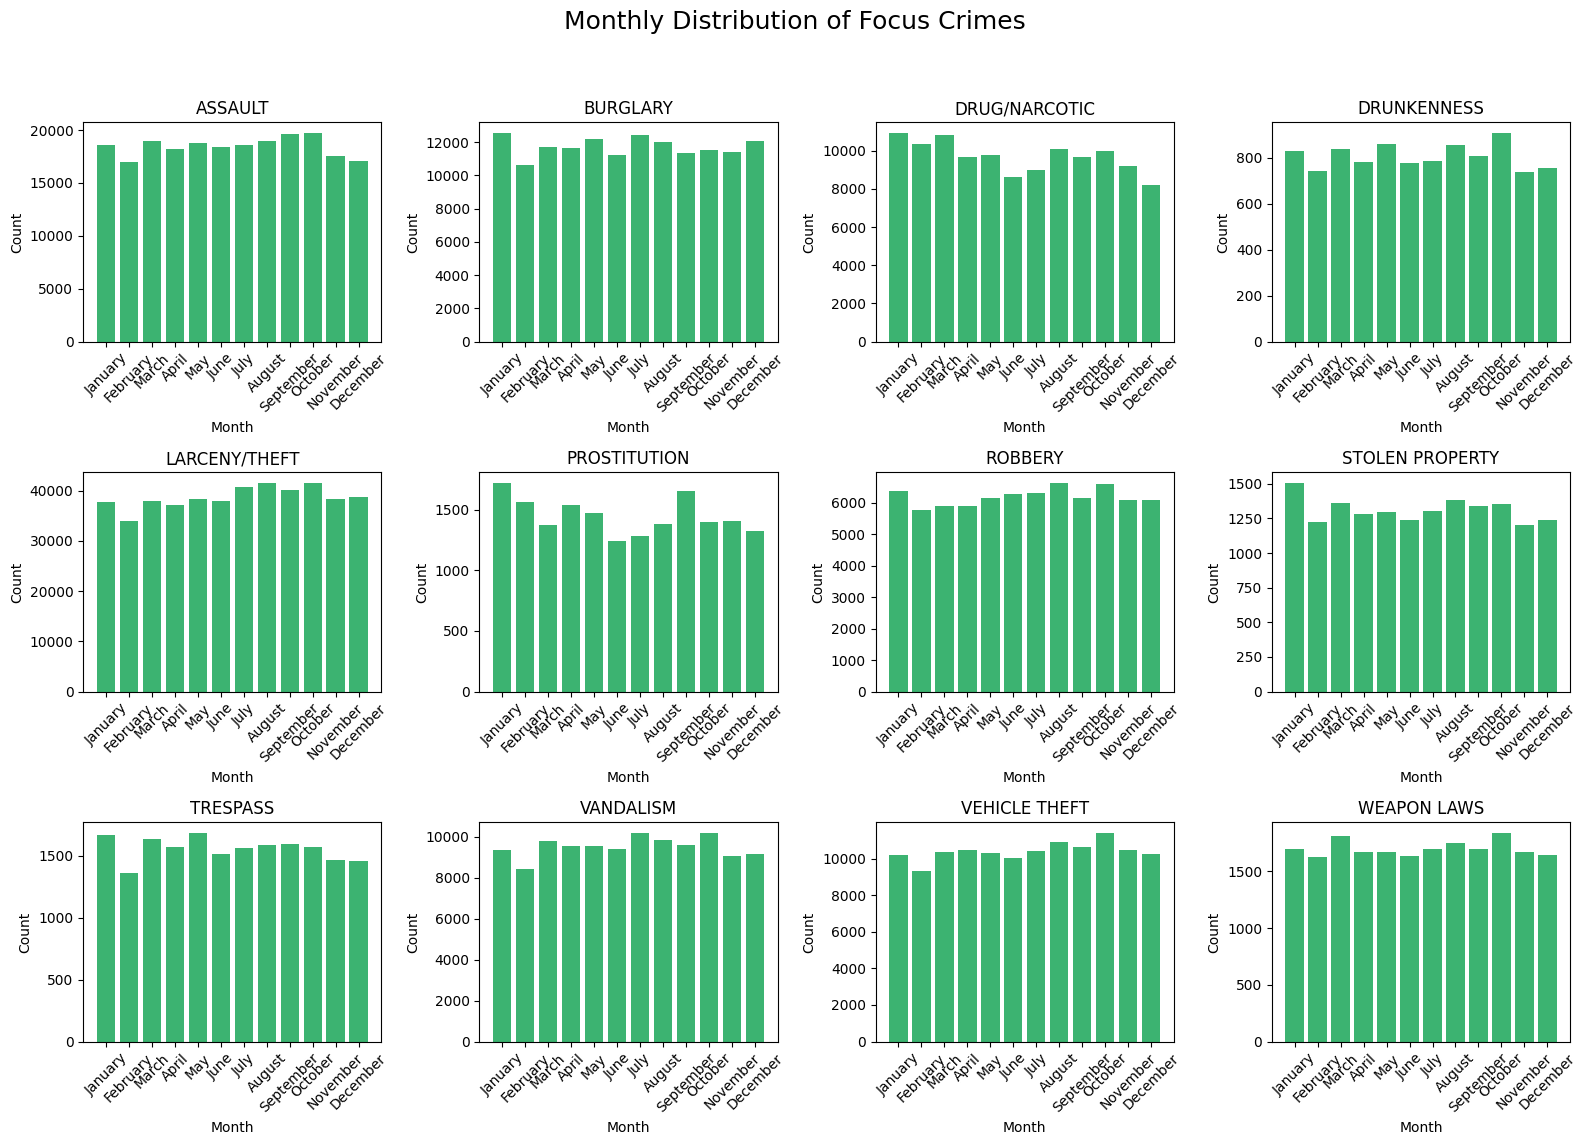

In [15]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Create a grid: For 12 focus crimes, use 3 rows x 4 columns
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
axs = axs.flatten()

for i, crime in enumerate(sorted_focus):
    # Filter the data for the current focus crime
    crime_df = df[df['Crime_Category'] == crime]
    # Count crimes per month, reindex to have consistent order (fill missing with 0)
    month_counts = crime_df['Month'].value_counts().reindex(month_order, fill_value=0)
    
    axs[i].bar(month_order, month_counts, color='mediumseagreen')
    axs[i].set_title(crime)
    axs[i].set_xlabel("Month")
    axs[i].set_ylabel("Count")
    axs[i].tick_params(axis='x', rotation=45)

# Remove any extra subplots if there are fewer than 12 focus crimes
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Monthly Distribution of Focus Crimes", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 24‑hour cycle

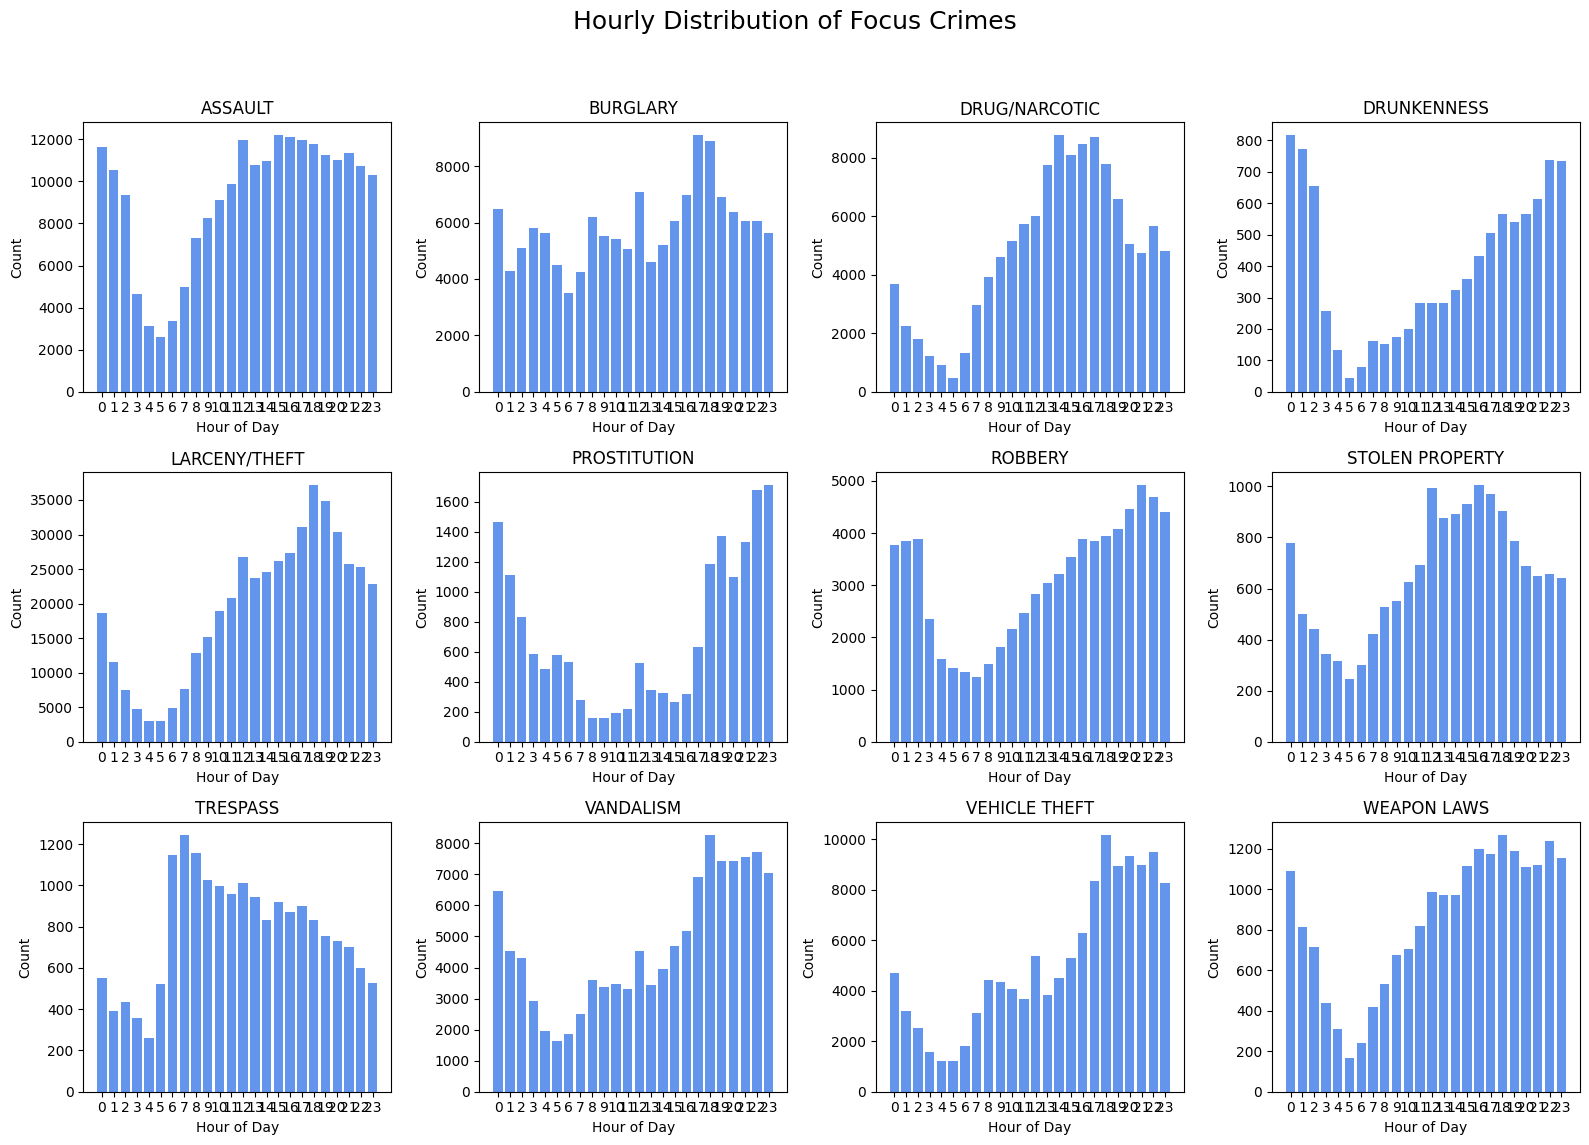

In [16]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
axs = axs.flatten()

hours_order = list(range(24))  # 0, 1, 2, ... 23

for i, crime in enumerate(sorted_focus):
    crime_df = df[df['Crime_Category'] == crime]
    # Count crimes by hour; reindex to have all 24 hours even if some are missing.
    hour_counts = crime_df['Hour'].value_counts().sort_index().reindex(hours_order, fill_value=0)
    
    axs[i].bar(hours_order, hour_counts, color='cornflowerblue')
    axs[i].set_title(crime)
    axs[i].set_xlabel("Hour of Day")
    axs[i].set_ylabel("Count")
    axs[i].set_xticks(hours_order)
    axs[i].tick_params(axis='x', rotation=0)

for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Hourly Distribution of Focus Crimes", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### HOUR OF WEEK

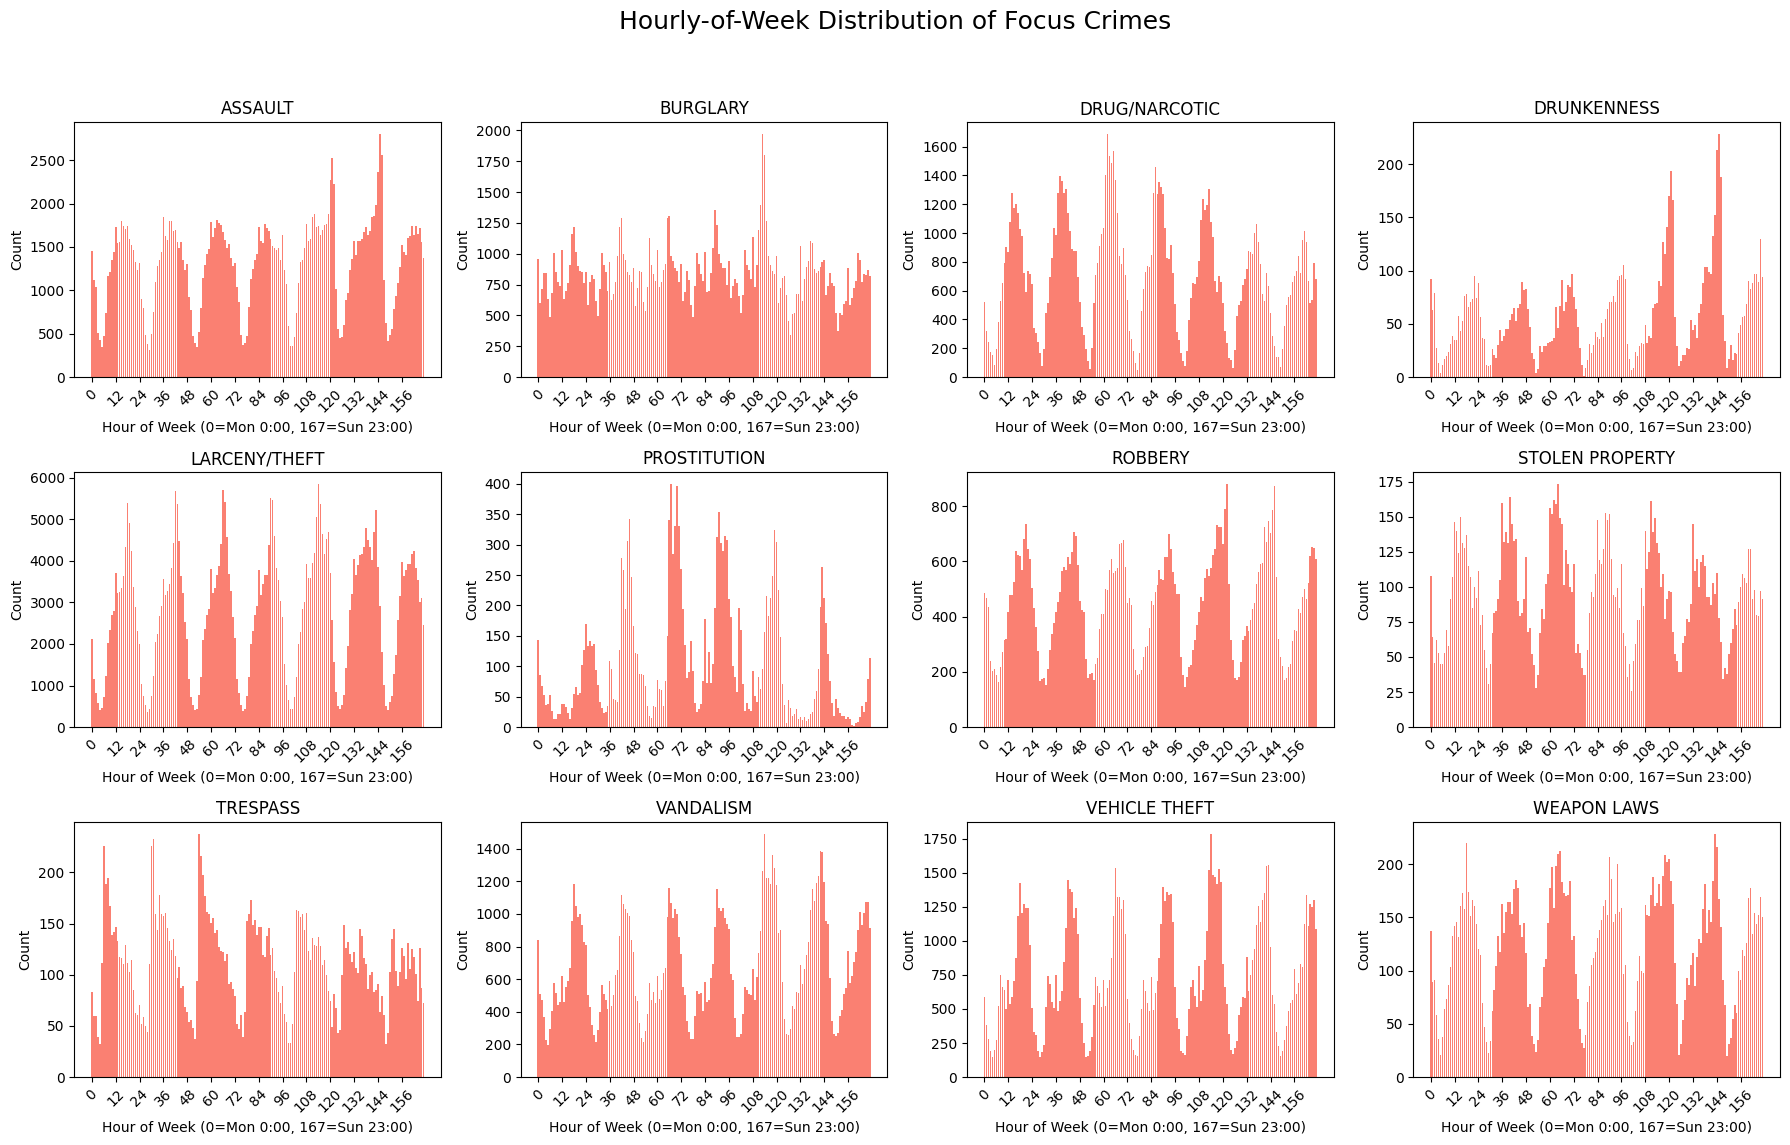

In [17]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
axs = axs.flatten()

# For the x-axis, we want to cover 168 hours. To keep plots legible, we might choose to label every 12 hours.
hour_week_order = list(range(168))

for i, crime in enumerate(sorted_focus):
    crime_df = df[df['Crime_Category'] == crime]
    # Count crimes per hour of week and reindex for all 168 hours.
    hour_week_counts = crime_df['Hour_Of_Week'].value_counts().sort_index().reindex(hour_week_order, fill_value=0)
    
    axs[i].bar(hour_week_order, hour_week_counts, color='salmon')
    axs[i].set_title(crime)
    axs[i].set_xlabel("Hour of Week (0=Mon 0:00, 167=Sun 23:00)")
    axs[i].set_ylabel("Count")
    # To avoid overcrowding, set x-ticks every 12 hours.
    tick_positions = list(range(0, 168, 12))
    axs[i].set_xticks(tick_positions)
    axs[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Hourly-of-Week Distribution of Focus Crimes", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 📊 10 Rules for Creating Nice Plots  

Creating clear and effective plots is essential for good data visualization. Follow these 10 rules to improve your plots and make them more readable, professional, and insightful.  

## 1️⃣ Use Subplots for Multiple Plots  
- Avoid infinite scrolling by **grouping related visualizations** into subplots.  
- This makes comparisons easier and improves report readability.  

## 2️⃣ Optimize Plot Spacing  
- **Matplotlib** sometimes adds too much white space.  
- Use `tight_layout()` to **remove unnecessary gaps** and improve the appearance.  

## 3️⃣ Always Include Labels  
- **Never submit a plot without axis labels!**  
- Include **title, x-label, y-label, and a legend** to provide full context.  

## 4️⃣ Use Meaningful Axis Values  
- Avoid arbitrary values like **increments of 17**; instead, use **natural breaks** (e.g., weeks instead of raw days).  

## 5️⃣ Be Mindful of Zoom Levels  
- **Don't mislead** by zooming in too much.  
- If your values range from **0 to 1**, don't zoom into **0.8 to 0.83** unless necessary.  

## 6️⃣ Keep Axes Consistent in Subplots  
- When using multiple subplots, **use the same scale** unless there's a clear reason not to.  
- If different scales are used, **explain it clearly** in the caption.  

## 7️⃣ Maximize the Data-Ink Ratio  
- Follow **Edward Tufte’s principle**:  
  - Remove unnecessary **borders, colors, shadows, and gridlines** unless they add value.  
  - Keep the focus on the **data, not decorations**.  

## 8️⃣ Use Professional Fonts  
- Default fonts like **DejaVu Sans** can look outdated.  
- Use **Helvetica or other clean, readable fonts** for better aesthetics.  

## 9️⃣ Write Clear and Informative Captions  
- A **good caption** should:  
  - **Describe** what the plot shows.  
  - **Highlight key insights** in a simple and structured way.  
  - Provide **context** (e.g., explain variables and units).  

## 🔟 Revise and Improve Your Plots  
- **Iterate and refine** your plots to remove clutter and enhance clarity.  
- **Ask yourself**: **Does this plot communicate the data effectively?**  

---

**By following these 10 rules, your plots will be clearer, more professional, and more effective! 🚀**


### Calendar

In [19]:
import calplot

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

(<Figure size 1250x3910 with 24 Axes>,
 array([<Axes: ylabel='2003'>, <Axes: ylabel='2004'>,
        <Axes: ylabel='2005'>, <Axes: ylabel='2006'>,
        <Axes: ylabel='2007'>, <Axes: ylabel='2008'>,
        <Axes: ylabel='2009'>, <Axes: ylabel='2010'>,
        <Axes: ylabel='2011'>, <Axes: ylabel='2012'>,
        <Axes: ylabel='2013'>, <Axes: ylabel='2014'>,
        <Axes: ylabel='2015'>, <Axes: ylabel='2016'>,
        <Axes: ylabel='2017'>, <Axes: ylabel='2018'>,
        <Axes: ylabel='2019'>, <Axes: ylabel='2020'>,
        <Axes: ylabel='2021'>, <Axes: ylabel='2022'>,
        <Axes: ylabel='2023'>, <Axes: ylabel='2024'>,
        <Axes: ylabel='2025'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

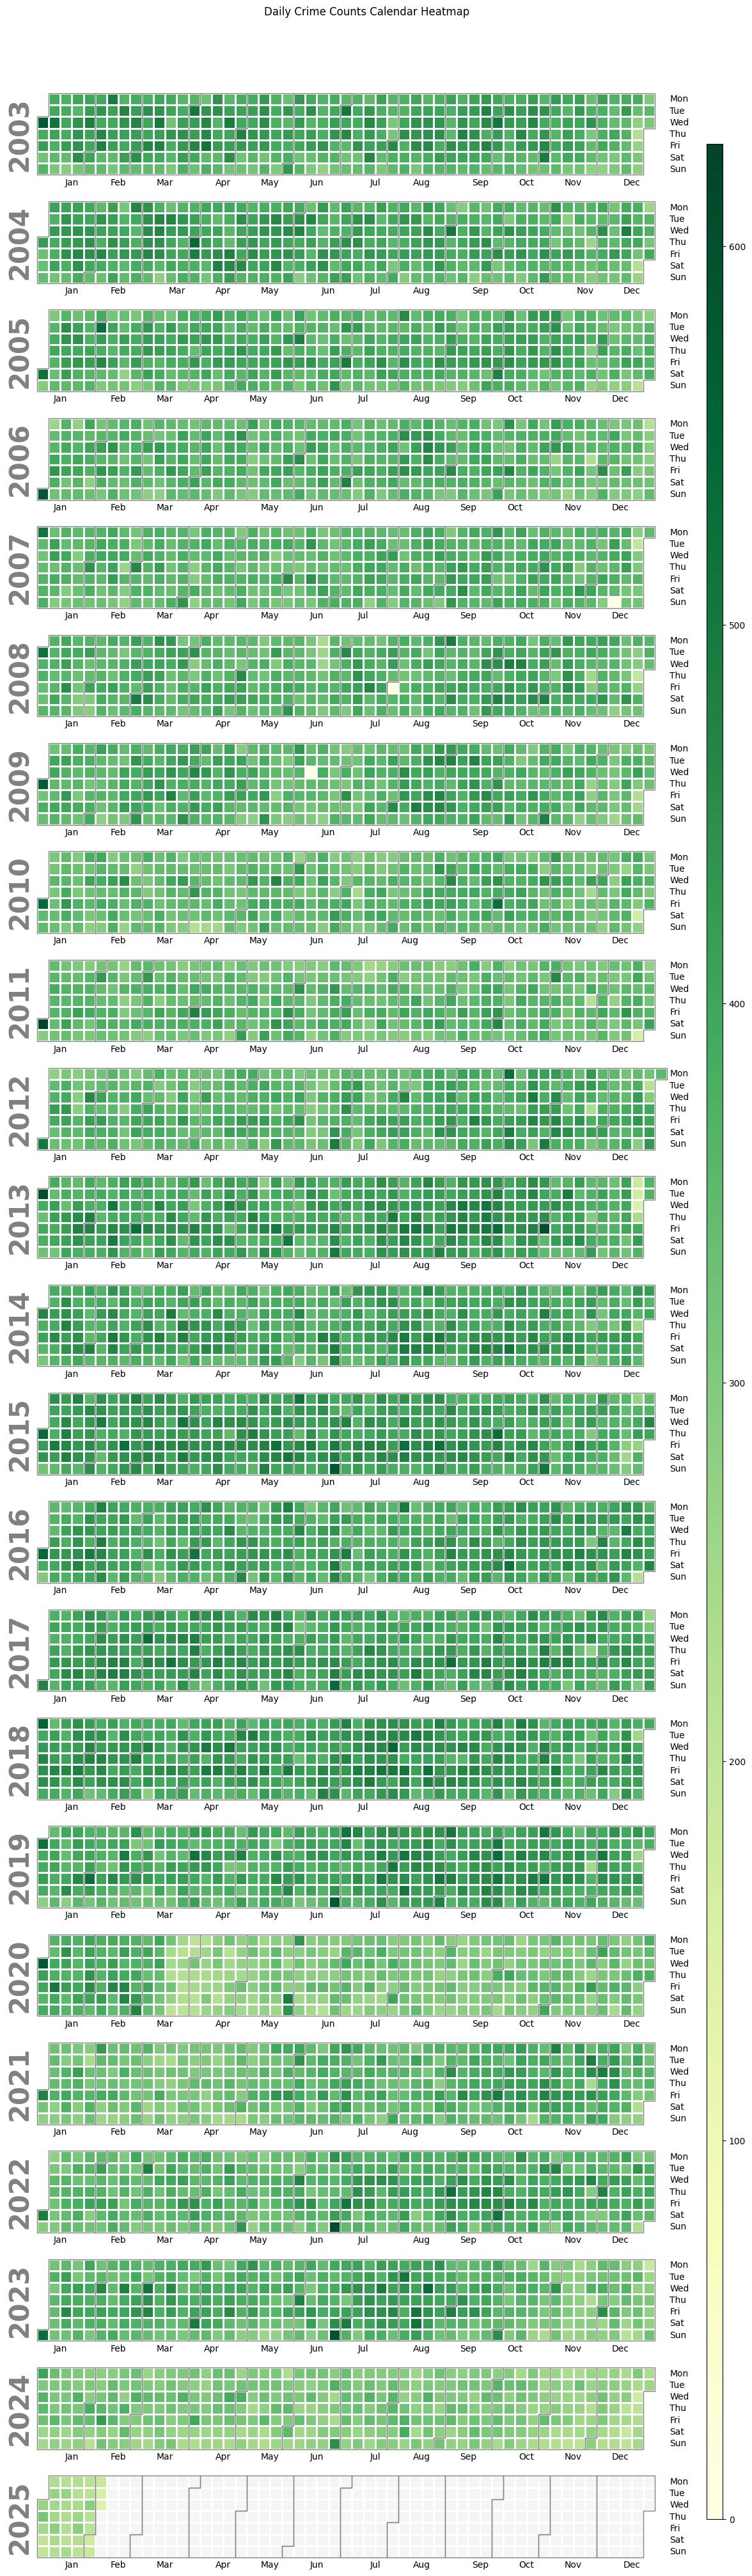

In [20]:
# Aggregate the crime counts by day: this creates a Series with a DatetimeIndex.
daily_counts = df.set_index('Crime_Date').resample('D').size()

# Option 1: Plot all years (complete years only) as subplots in one figure.
# This will produce a calendar heatmap for each year that appears in the data.
calplot.calplot(daily_counts, cmap='YlGn', colorbar=True,
                suptitle='Daily Crime Counts Calendar Heatmap')

<Axes: >

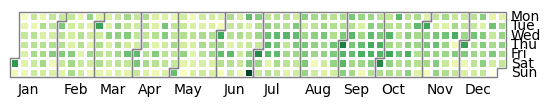

In [24]:
# Option 2: Alternatively, if you wish to focus on a single year, e.g., 2017:
year = 2022
daily_counts_2017 = daily_counts[daily_counts.index.year == year]
calplot.yearplot(daily_counts_2017, year=year, cmap='YlGn',
                 )

### Polar bar chart

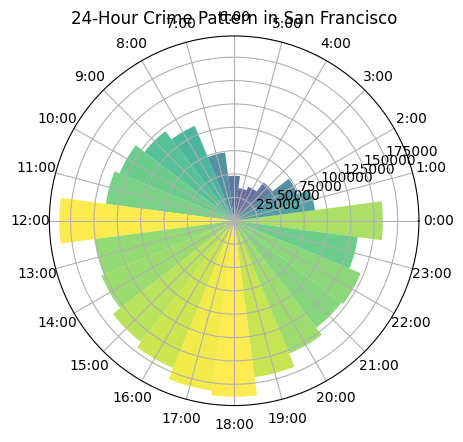

In [25]:
# Assuming df is your cleaned DataFrame and that you have already created an 'Hour' column.
# Group the data by hour (0 to 23) and sort by the hour.
hourly_counts = df['Hour'].value_counts().sort_index()

# Create arrays of the hours and corresponding crime counts.
hours = np.array(hourly_counts.index)         # Should be 0,1,...,23
counts = np.array(hourly_counts.values)         # The number of crimes for each hour

# Compute theta for each hour: map hours 0-23 to angles in radians.
theta = 2 * np.pi * hours / 24

# Use a uniform width for each bar: the full circle divided by 24.
width = 2 * np.pi / 24

# Normalize counts for the colormap (optional): we use the viridis colormap.
colors = plt.cm.viridis(counts / counts.max())

# Create a polar subplot.
ax = plt.subplot(projection='polar')
bars = ax.bar(theta, counts, width=width, bottom=0.0, color=colors, alpha=0.8)

# Customize the tick labels: show each hour (e.g., 0:00, 1:00, ..., 23:00).
ax.set_xticks(theta)
ax.set_xticklabels([f"{int(h)}:00" for h in hours])

# Optionally add a title to the chart.
plt.title("24-Hour Crime Pattern in San Francisco", va='bottom')
plt.show()

### Time Series

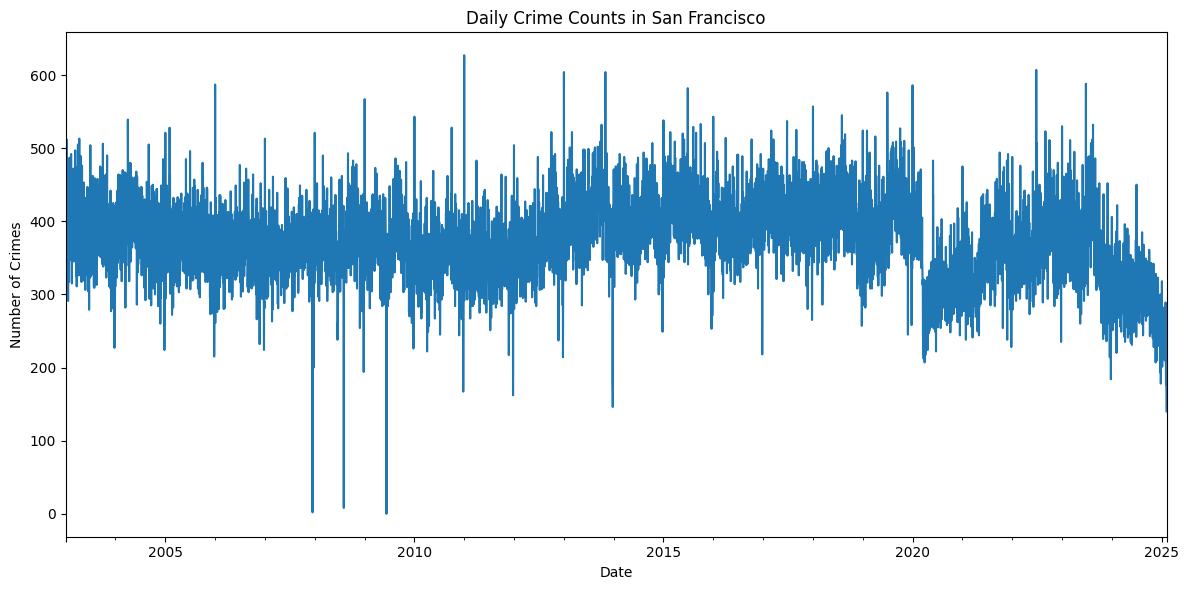

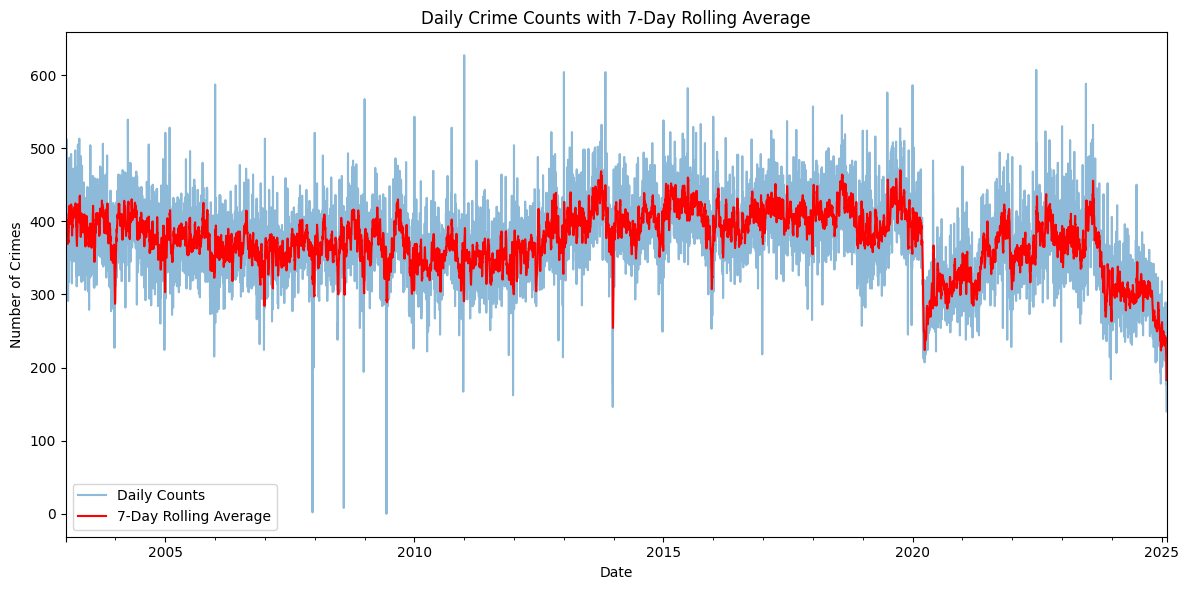

In [26]:
df = df.set_index('Crime_Date')

# Resample the data by day (counting the number of crimes per day).
daily_counts = df.resample('D').size()

# Plot the daily counts.
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.title('Daily Crime Counts in San Francisco')
plt.tight_layout()
plt.show()

# For smoothing, you might compute a rolling average, say over 7 days:
rolling_avg = daily_counts.rolling(window=7).mean()

plt.figure(figsize=(12, 6))
daily_counts.plot(alpha=0.5, label='Daily Counts')
rolling_avg.plot(color='red', label='7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.title('Daily Crime Counts with 7-Day Rolling Average')
plt.legend()
plt.tight_layout()
plt.show()

#### The types of crime and how they take place across San Francisco's police districts.

In [27]:
df.columns

Index(['Crime_Category', 'Time', 'PdDistrict', 'X', 'Y', 'Year', 'Weekday',
       'Month', 'Hour', 'DayOfWeek', 'Hour_Of_Week'],
      dtype='object')

In [30]:
#print(df['PdDistrict'].head())
print(df['Crime_Category'].head())

Crime_Date
2004-11-22          ROBBERY
2005-10-18    VEHICLE THEFT
2004-02-15    VEHICLE THEFT
2011-02-18            ARSON
2010-11-21          ASSAULT
Name: Crime_Category, dtype: object


In [34]:
districts = df['PdDistrict'].unique()
print("SF Police Districts:", districts)

SF Police Districts: ['INGLESIDE' 'PARK' 'SOUTHERN' 'TARAVAL' 'TENDERLOIN' 'BAYVIEW' 'CENTRAL'
 'NORTHERN' 'MISSION' 'RICHMOND' nan '6.0' '2.0' '4.0' '1.0' '3.0' '8.0'
 '7.0' '5.0' '9.0' '10.0' 5.0 6.0 2.0 1.0 3.0 10.0 4.0 7.0 8.0 9.0]


In [ ]:
clean_districts = [d for d in districts if isinstance(d, str) and d.isalpha()]
print("Cleaned SF Police Districts:", clean_districts)

Cleaned SF Police Districts: ['INGLESIDE', 'PARK', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN', 'BAYVIEW', 'CENTRAL', 'NORTHERN', 'MISSION', 'RICHMOND']


In [43]:
def is_valid_district(x):
    return isinstance(x, str) and x.isalpha()

# Create a cleaned dataframe that only contains rows with valid district names
df_clean = df[df['PdDistrict'].apply(is_valid_district)]

# Filter the dataframe for focus crimes and count by district
focus_crime_counts = df_clean[df_clean['Crime_Category'].isin(focuscrimes)]['PdDistrict'].value_counts()

print("Focus Crime Counts by District:")
print(focus_crime_counts)

Focus Crime Counts by District:
PdDistrict
SOUTHERN      219454
NORTHERN      166273
MISSION       155606
CENTRAL       134443
BAYVIEW       108617
TENDERLOIN    101381
INGLESIDE      98531
TARAVAL        85385
PARK           65378
RICHMOND       64286
Name: count, dtype: int64


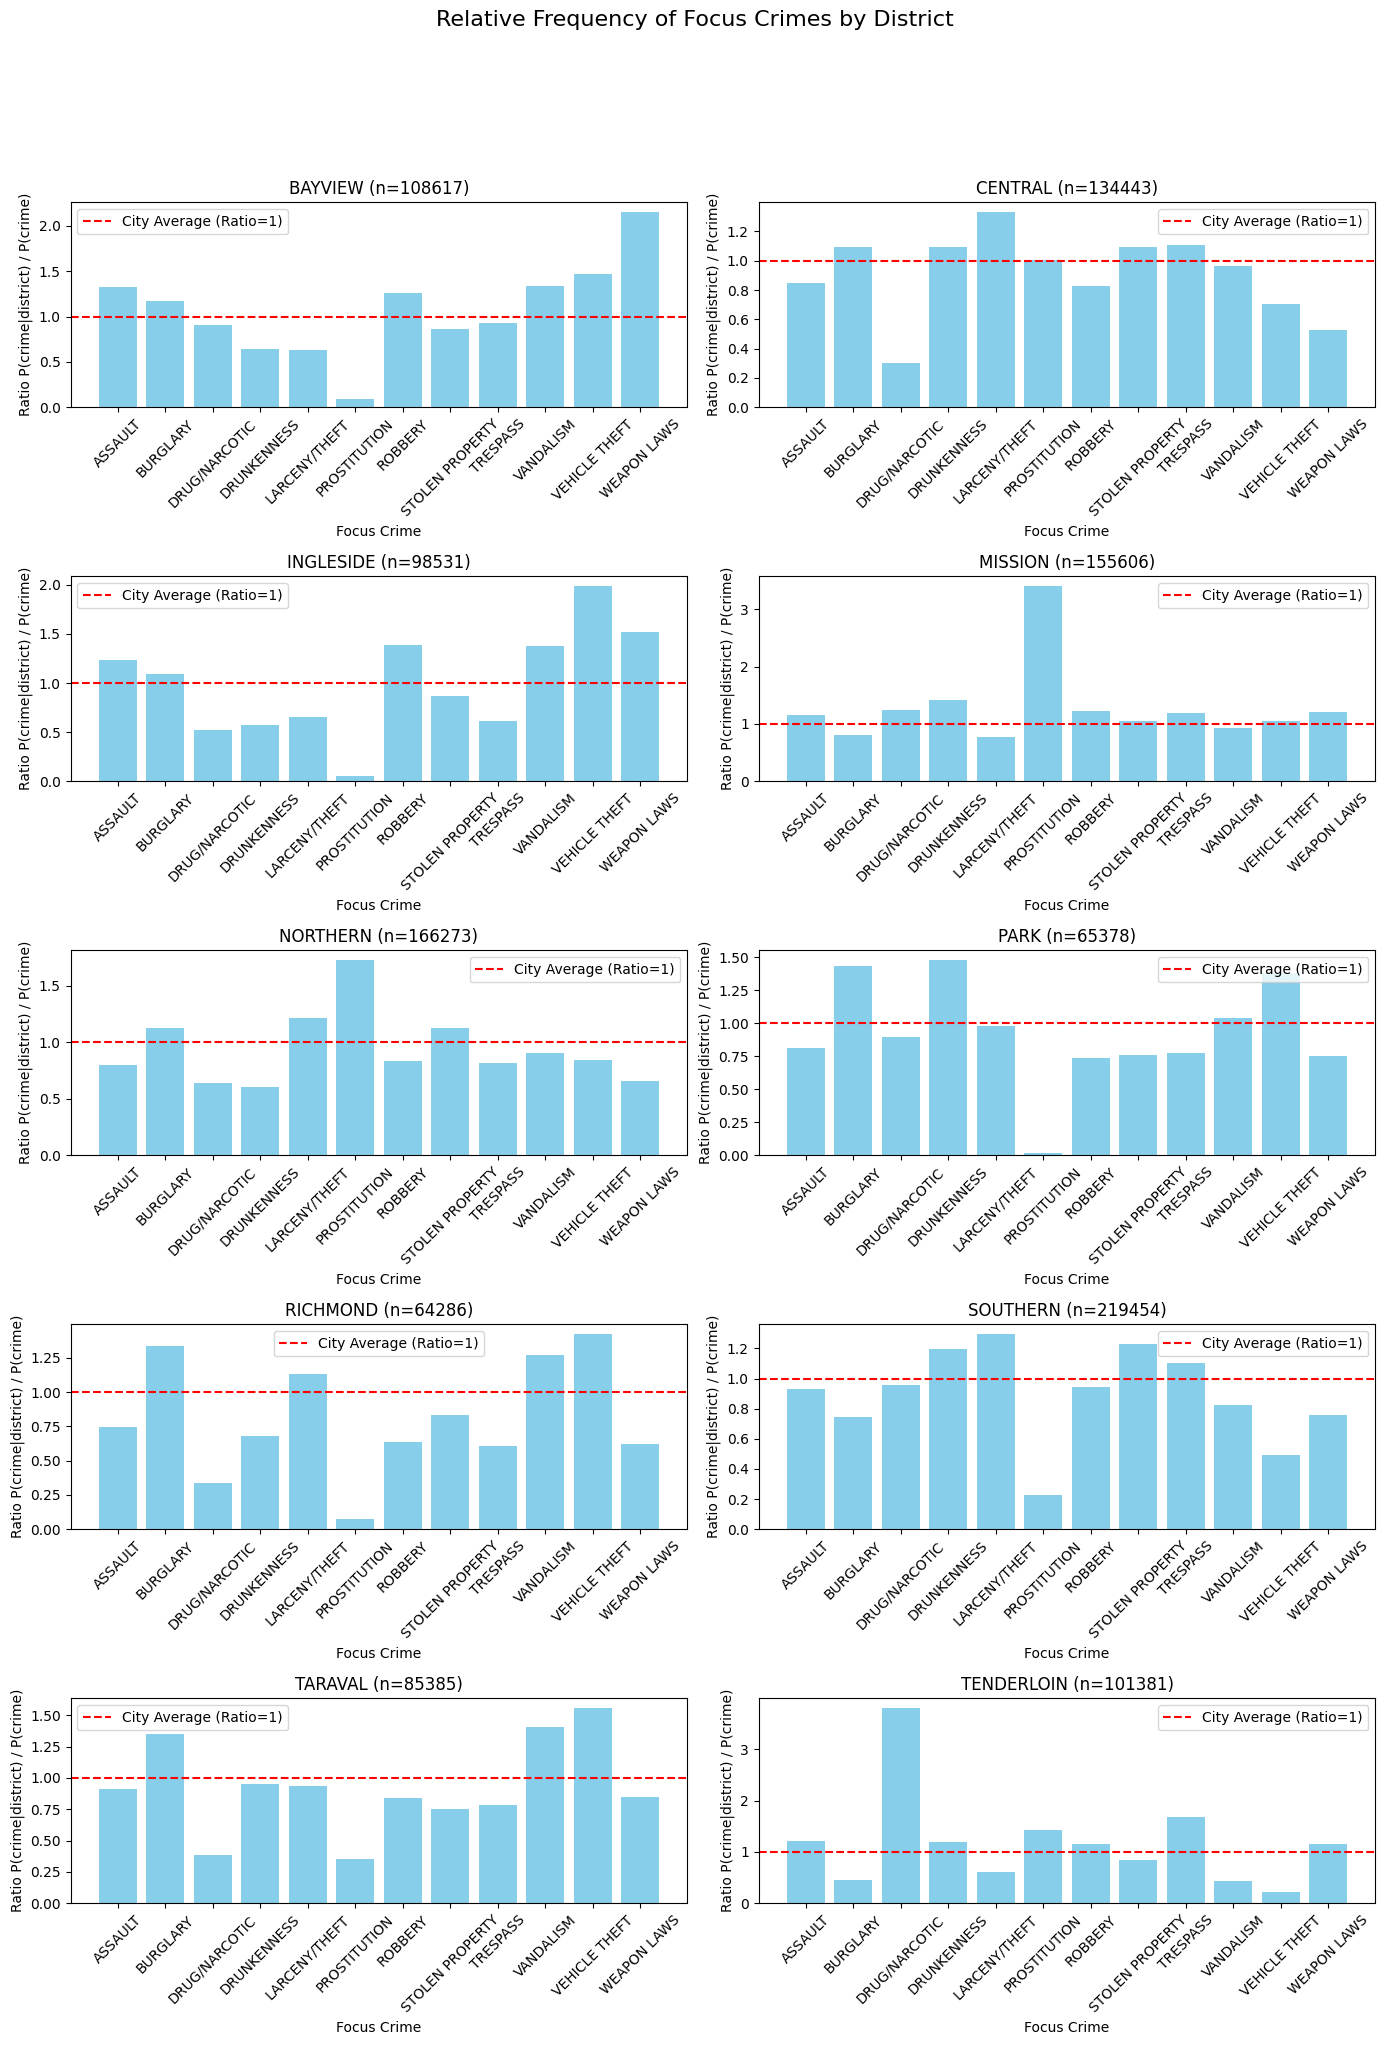

In [44]:
# Filter the dataset to only include focus crimes.
df_focus = df_clean[df_clean['Crime_Category'].isin(focuscrimes)]

# --- STEP 1: Compute overall probabilities P(crime) ---
overall_counts = df_focus['Crime_Category'].value_counts().sort_index()
total_overall = overall_counts.sum()
P_crime = overall_counts / total_overall
# Reindex so that the order is consistent (using sorted order of our focus crimes)
sorted_focus = sorted(focuscrimes)
P_crime = P_crime.reindex(sorted_focus, fill_value=0)

# --- STEP 2 & 3: For each district, compute P(crime|district) and ratio ---
# Get a sorted list of valid district names.
districts = sorted(df_clean['PdDistrict'].unique())

# Set up a grid for plotting; for example, 2 columns.
n_districts = len(districts)
ncols = 2
nrows = (n_districts + 1) // ncols

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows*4))
axs = axs.flatten()

for i, district in enumerate(districts):
    # Filter data for the current district
    district_data = df_focus[df_focus['PdDistrict'] == district]
    district_counts = district_data['Crime_Category'].value_counts().sort_index()
    total_district = district_counts.sum()
    # Compute P(crime|district)
    P_crime_district = district_counts / total_district
    # Ensure every focus crime appears (fill missing with 0)
    P_crime_district = P_crime_district.reindex(sorted_focus, fill_value=0)
    
    # Calculate the ratio; if P(crime) is 0 for any (shouldn't be for our focus crimes) we fill with 0.
    ratio = P_crime_district / P_crime
    ratio = ratio.fillna(0)
    
    ax = axs[i]
    # Plot as a bar chart (histogram)
    ax.bar(ratio.index, ratio.values, color='skyblue')
    ax.axhline(1, color='red', linestyle='--', label='City Average (Ratio=1)')
    ax.set_title(f"{district} (n={total_district})")
    ax.set_xlabel("Focus Crime")
    ax.set_ylabel("Ratio P(crime|district) / P(crime)")
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

# Remove any unused subplots.
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Relative Frequency of Focus Crimes by District", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()